# **About the dataset**

This dataset was obtained from the [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) that aims to provide a wide range of insights regarding several world problems.

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
# %matplotlib inline

# Making plots pretty
sns.set_style("darkgrid")

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

In [3]:
data = pd.read_csv("data/owid-co2-data.csv")
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,0.002,NaN,NaN,0.015,0.002,NaN,NaN,NaN,NaN,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,0.011,0.009,NaN,0.021,0.003,NaN,NaN,NaN,NaN,0.099,0.036,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.008,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,0.012,0.009,NaN,0.026,0.003,NaN,NaN,NaN,NaN,0.191,0.061,NaN,NaN,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066,0.008,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,0.012,0.009,NaN,0.032,0.004,NaN,NaN,NaN,NaN,0.282,0.093,NaN,NaN,0.189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060,0.007,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,0.013,0.010,NaN,0.038,0.005,NaN,NaN,NaN,NaN,0.388,0.131,NaN,NaN,0.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068,0.009,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26008 entries, 0 to 26007
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              26008 non-null  object 
 1   year                                 26008 non-null  int64  
 2   iso_code                             21913 non-null  object 
 3   population                           23878 non-null  float64
 4   gdp                                  13479 non-null  float64
 5   cement_co2                           12668 non-null  float64
 6   cement_co2_per_capita                12638 non-null  float64
 7   co2                                  24670 non-null  float64
 8   co2_growth_abs                       24294 non-null  float64
 9   co2_growth_prct                      25696 non-null  float64
 10  co2_per_capita                       24032 non-null  float64
 11  co2_per_gdp                 

In [5]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

Column names already standardized.

In [6]:
data.dtypes[data.dtypes != "float64"]

country     object
year         int64
iso_code    object
dtype: object

In [7]:
# Checking missing values
features_dict = dict()
for col in data:
    features_dict.update({col: [data[col].isnull().sum()]})

df_nans = pd.DataFrame.from_dict(features_dict, orient="index").reset_index()
df_nans.rename(columns={"index": "Variable", 0: "NaNs"}, inplace=True)
df_nans

,Variable,NaNs
0,country,0
1,year,0
2,iso_code,4095
3,population,2130
4,gdp,12529
5,cement_co2,13340
6,cement_co2_per_capita,13370
7,co2,1338
8,co2_growth_abs,1714
9,co2_growth_prct,312


<Figure size 2000x1500 with 0 Axes>

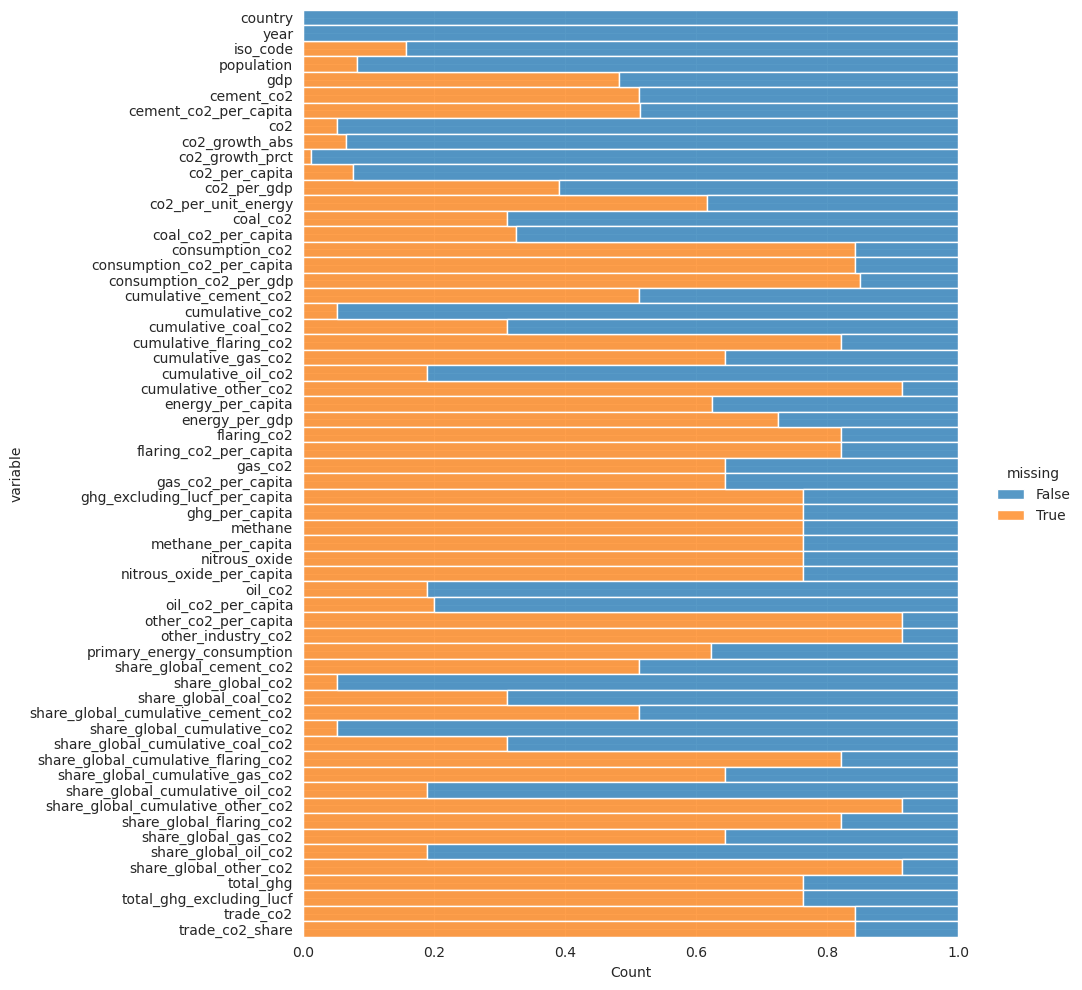

In [8]:
plt.figure(figsize=(20, 15))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", height=10, aspect=1)
plt.show()

<AxesSubplot:>

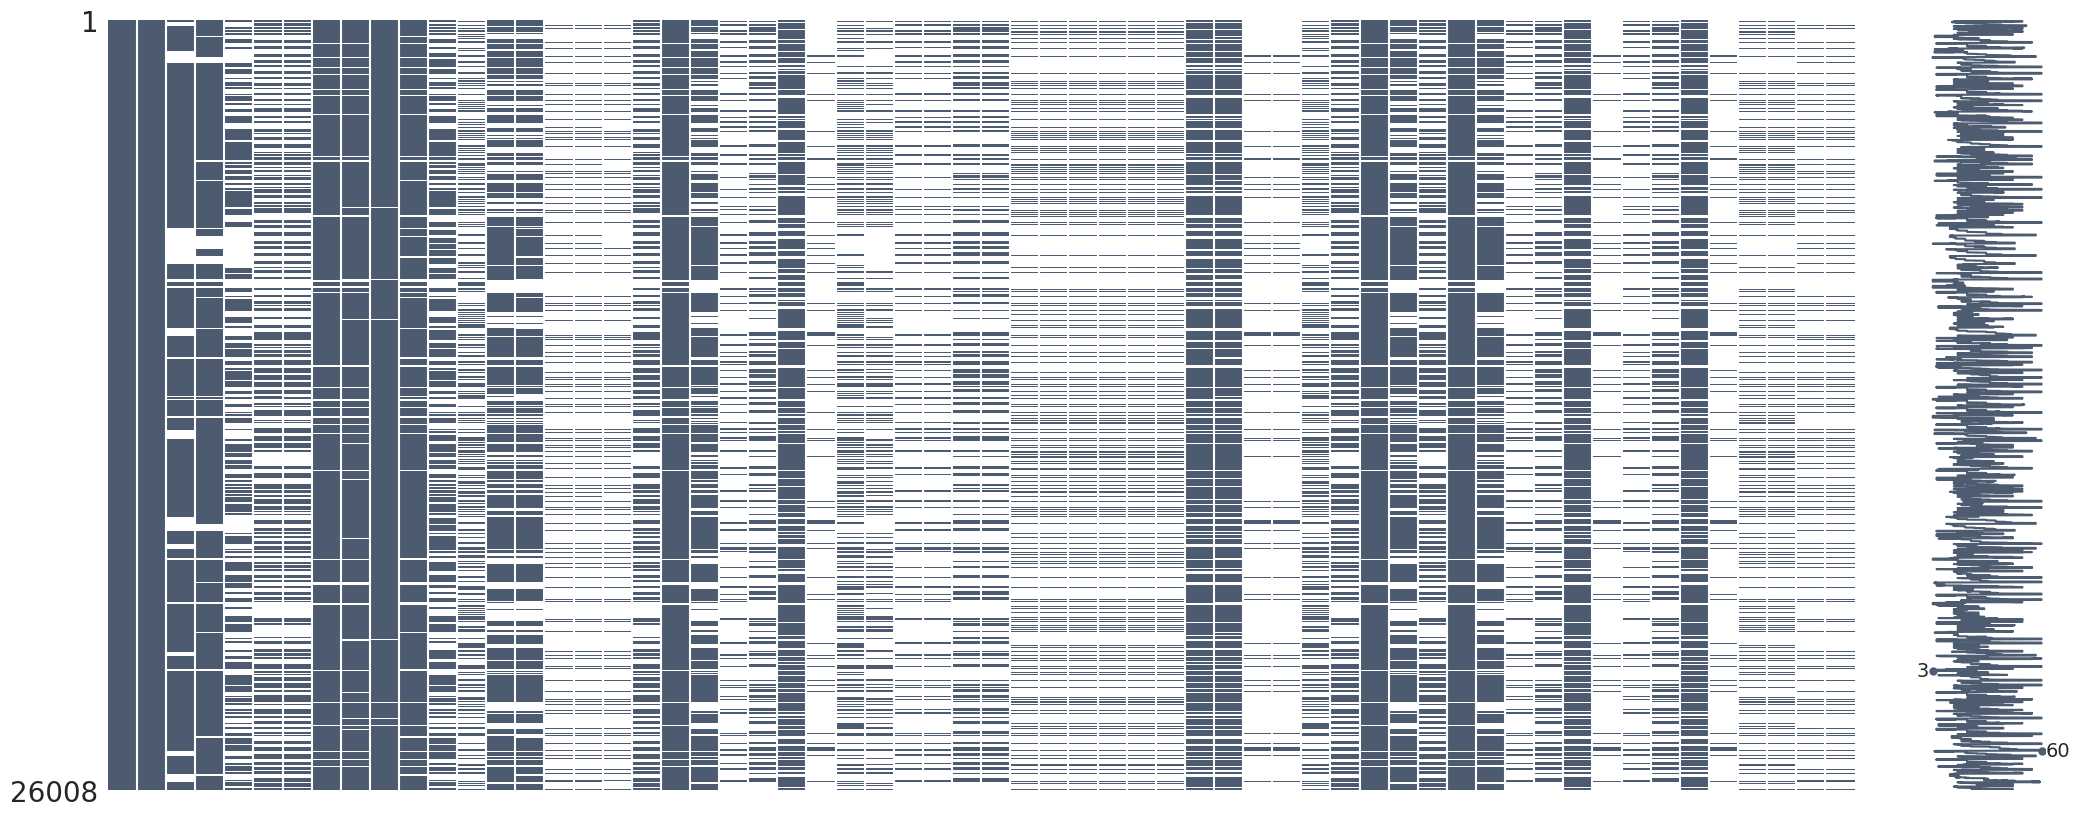

In [9]:
# Visualizing missing values
msno.matrix(data, color=(0.3, 0.36, 0.44))

There are many columns practically empty. Hence, for the purposes of this project, some columns will be deleted.

In [10]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [11]:
cols_to_delete = [
    'consumption_co2',
    'consumption_co2_per_capita',
    'consumption_co2_per_gdp',
    'flaring_co2',
    'flaring_co2_per_capita',
    'ghg_excluding_lucf_per_capita',
    'ghg_per_capita',
    'methane',
    'methane_per_capita',
    'nitrous_oxide',
    'nitrous_oxide_per_capita',
    'share_global_cumulative_flaring_co2',
    'total_ghg',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]

df = data.copy()
df.drop(columns=cols_to_delete, axis=1, inplace=True)
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',

<AxesSubplot:>

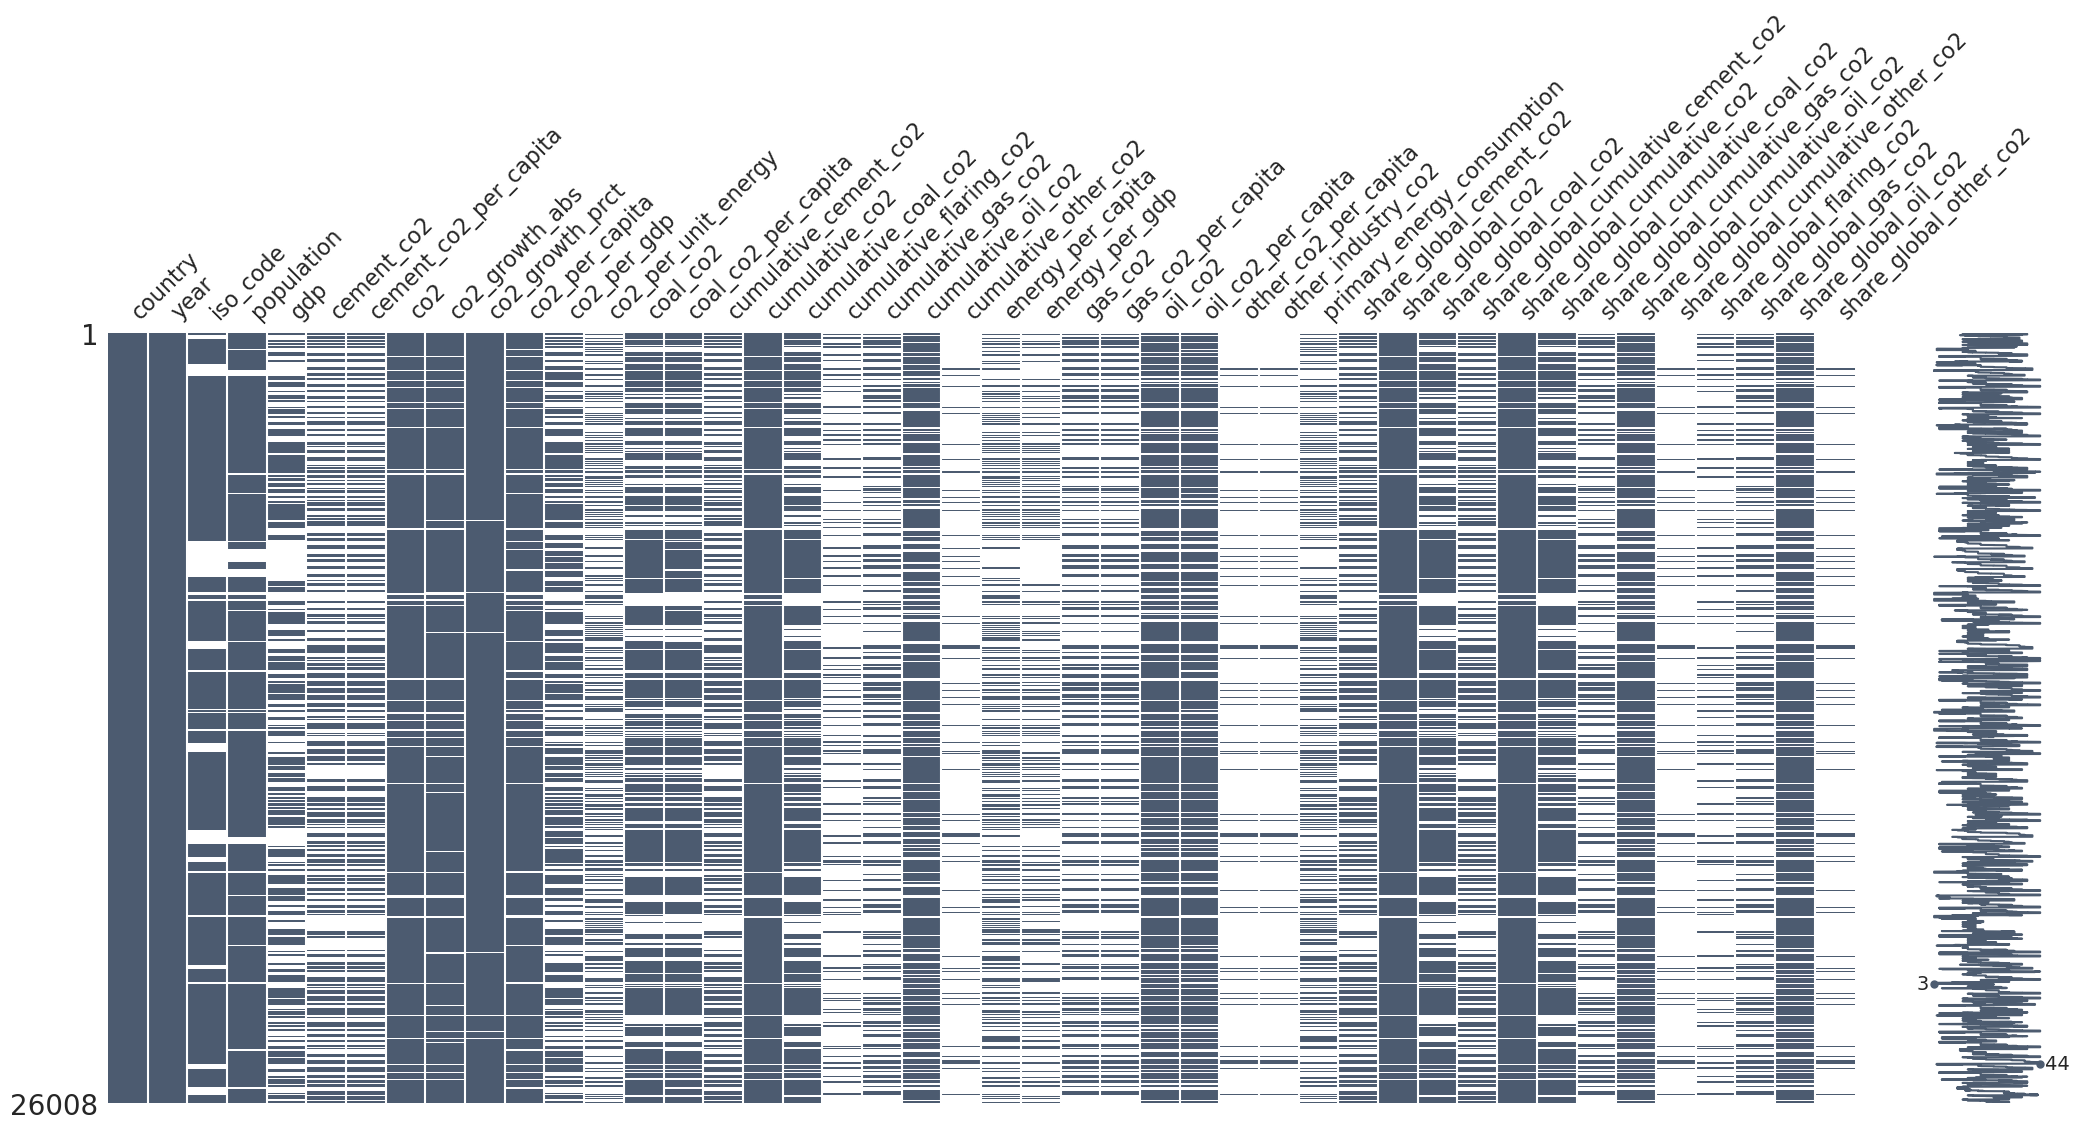

In [12]:
msno.matrix(df, color=(0.3, 0.36, 0.44))

**Verificar missing values por país año a año y rellenarlos interpolando!!!**

# **Data Pre-processing**

### **Year column**

In [13]:
print("min year:", df["year"].min())
print("max year:", df["year"].max())

min year: 1750
max year: 2020


In [14]:
df["year"].isnull().sum()

0

No missing values in the year column.

In [15]:
# Removing entries dated before 1900's. Analysis will be made from the beginning of the 20th century.
df = df[df["year"] >= 1900]

In [16]:
years = df["year"].unique()
years.sort()
years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### **ISO code column**

In [17]:
df[df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Asia', 'Asia (excl. China & India)', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'French Equatorial Africa', 'French West Africa',
       'High-income countries', 'International transport', 'Kosovo',
       'Kuwaiti Oil Fires', 'Leeward Islands', 'Low-income countries',
       'Lower-middle-income countries', 'North America',
       'North America (excl. USA)', 'Oceania', 'Panama Canal Zone',
       'Ryukyu Islands', 'South America', 'St. Kitts-Nevis-Anguilla',
       'Upper-middle-income countries', 'World'], dtype=object)

There are some countries with small amount of data that can be considered as not too relevant for the purposes of this project. Therefore, their data will be deleted for simplification.

In [18]:
countries_to_delete = [
    'French Equatorial Africa',
    'French West Africa',
    'Kosovo',
    'Kuwaiti Oil Fires',
    'Leeward Islands',
    'Panama Canal Zone',
    'Ryukyu Islands',
    'St. Kitts-Nevis-Anguilla',
    'Bonaire Sint Eustatius and Saba',
    'Christmas Island',
    'Sint Maarten (Dutch part)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'International transport'
]

# Checking the amount of CO2 emitted for each country with no ISO code assigned.
for country in countries_to_delete:
    co2 = df[(df["country"] == country) & ~(df["co2"].isnull())]["co2"].sum()
    print(f"CO2 Emssions: {country} = {np.round(co2, 3)}")

CO2 Emssions: French Equatorial Africa = 2.659
CO2 Emssions: French West Africa = 9.765
CO2 Emssions: Kosovo = 105.637
CO2 Emssions: Kuwaiti Oil Fires = 477.925
CO2 Emssions: Leeward Islands = 0.179
CO2 Emssions: Panama Canal Zone = 14.762
CO2 Emssions: Ryukyu Islands = 20.892
CO2 Emssions: St. Kitts-Nevis-Anguilla = 0.624
CO2 Emssions: Bonaire Sint Eustatius and Saba = 30.353
CO2 Emssions: Christmas Island = 1.333
CO2 Emssions: Sint Maarten (Dutch part) = 67.709
CO2 Emssions: Europe (excl. EU-27) = 223970.264
CO2 Emssions: Europe (excl. EU-28) = 162132.889
CO2 Emssions: International transport = 42242.538


In [19]:
# Dropping the countries
for country in countries_to_delete:
    value = df[df["country"] == country].index
    df.drop(labels=value, axis=0, inplace=True)

In [20]:
# Verifying countries were dropped
df[df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Asia', 'Asia (excl. China & India)', 'Europe',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America',
       'North America (excl. USA)', 'Oceania', 'South America',
       'Upper-middle-income countries', 'World'], dtype=object)

In [21]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',

<AxesSubplot:>

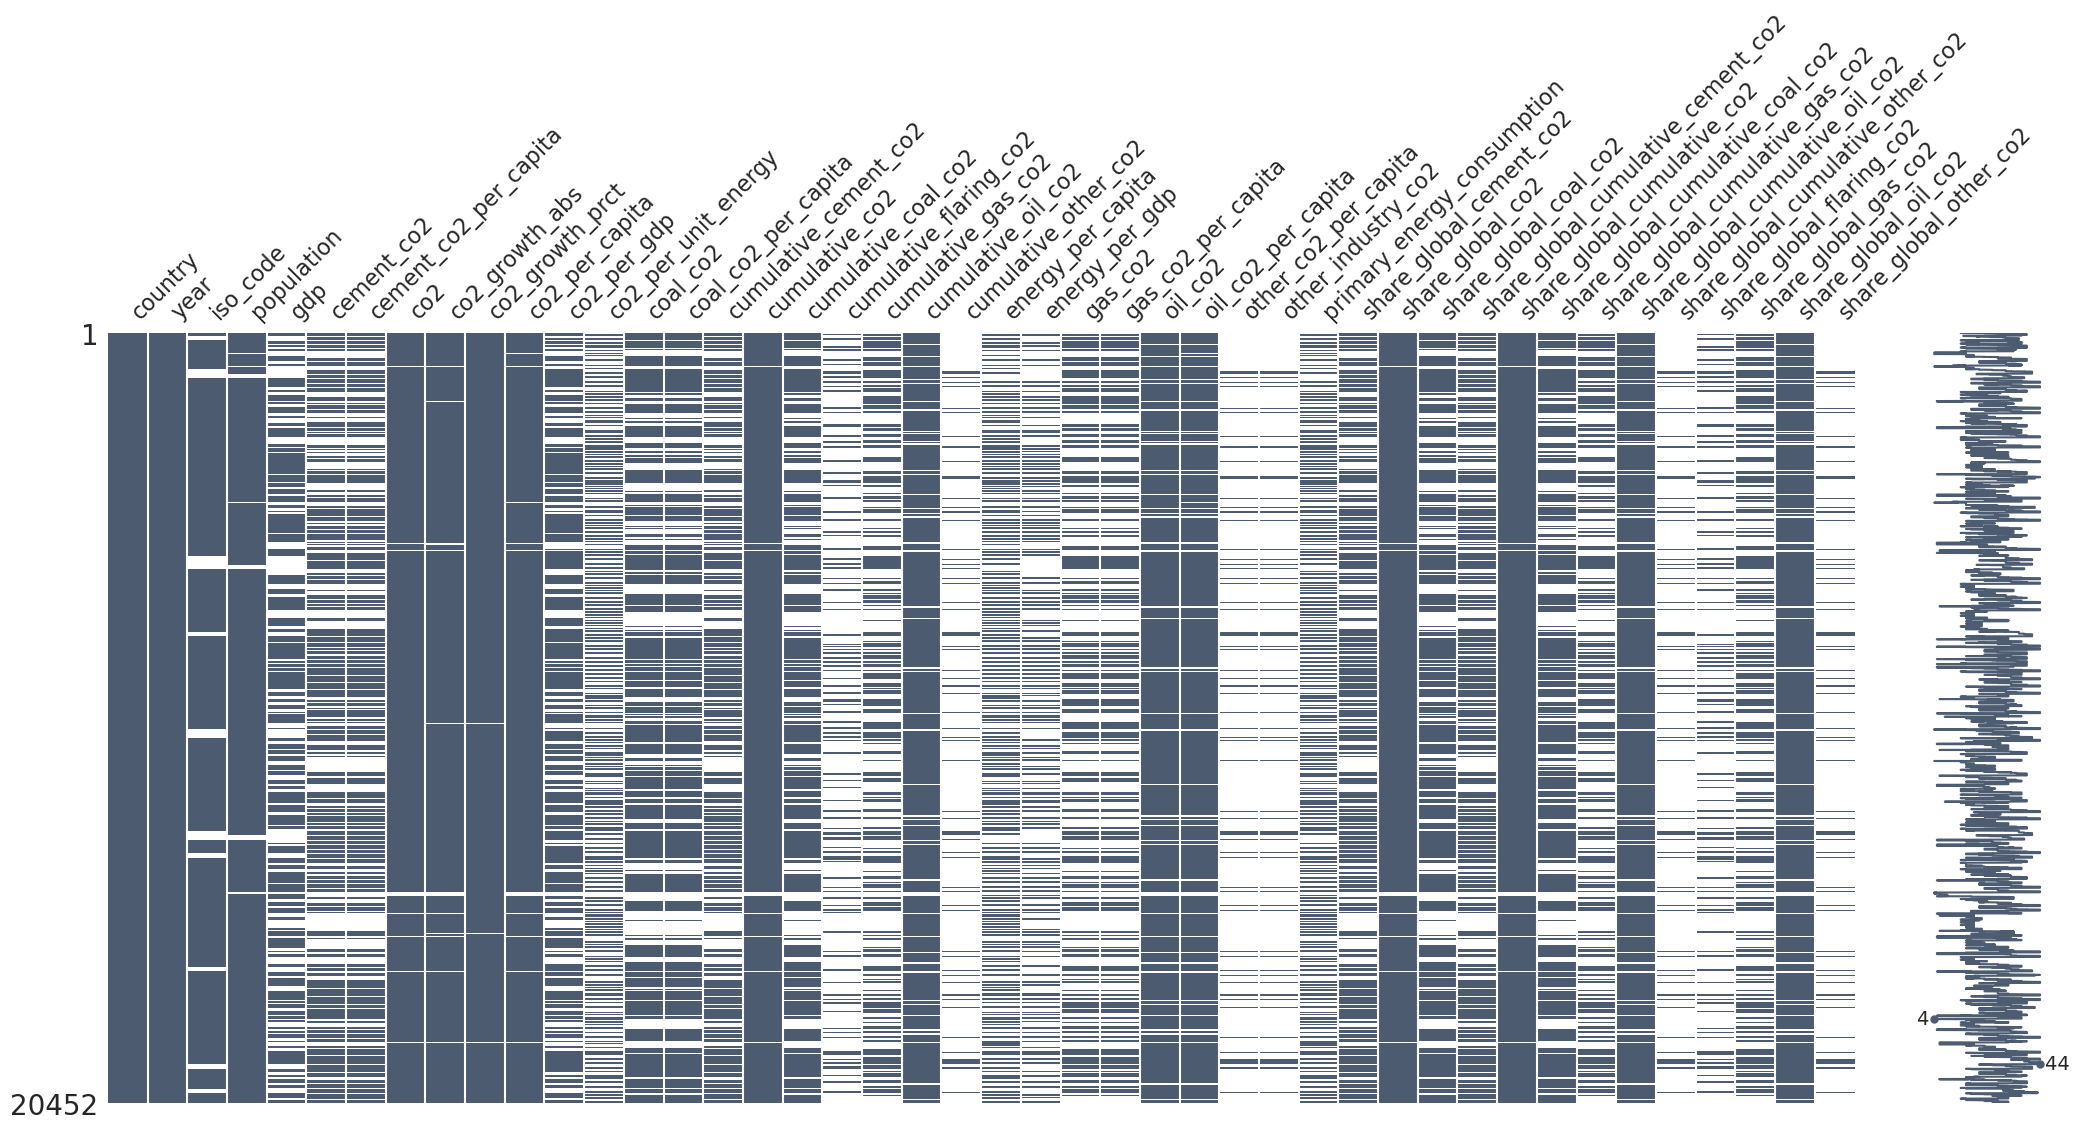

In [22]:
msno.matrix(df, color=(0.3, 0.36, 0.44))

# **Exploratory Data Analysis**

### **1. Yearly world CO2 emissions.**

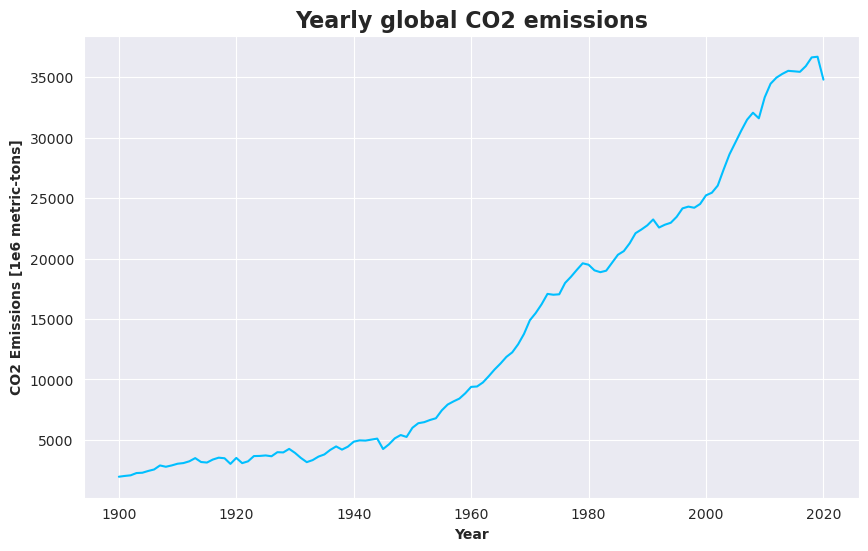

In [24]:
world_emissions = df[df["country"] == "World"][["year", "co2"]]
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_emissions, x=world_emissions["year"], y=world_emissions["co2"], color="deepskyblue")
plt.title("Yearly global CO2 emissions", fontweight="bold", fontsize=16)
plt.xlabel("Year", weight="bold")
plt.ylabel("CO2 Emissions [1e6 metric-tons]", weight="bold")
plt.show()

### **2. CO2 emissions by continent.**

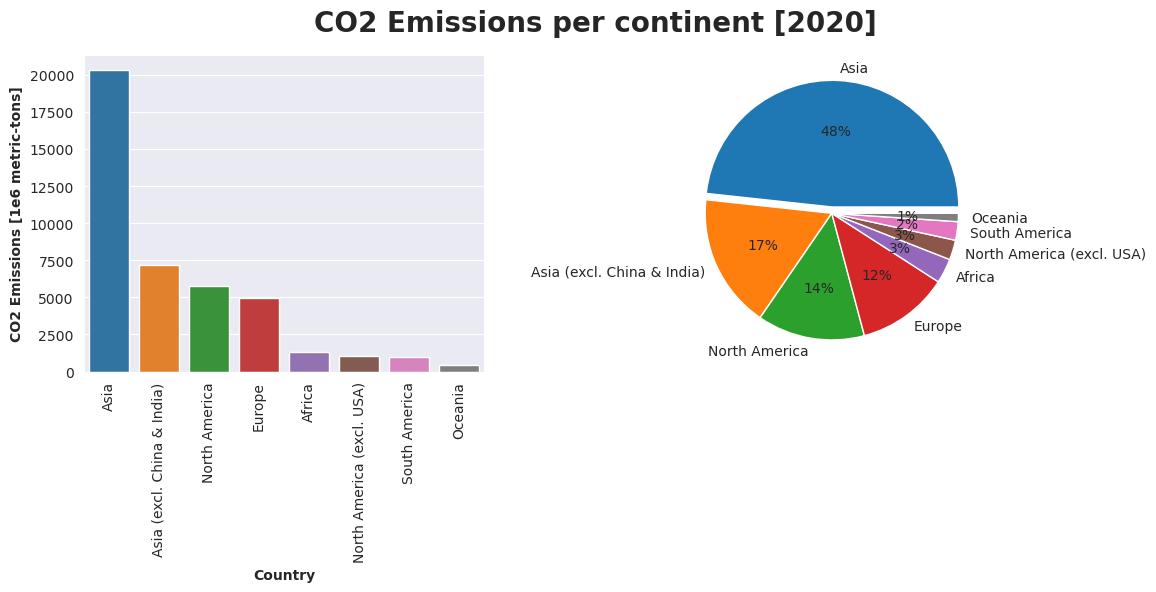

In [31]:
emissions_by_continent = df[(df["country"] == "North America") |
                            (df["country"] == "North America (excl. USA)") |
                            (df["country"] == "South America") |
                            (df["country"] == "Africa") |
                            (df["country"] == "Europe") | 
                            (df["country"] == "Asia") |
                            (df["country"] == "Asia (excl. China & India)") |
                            (df["country"] == "Oceania")
                            ][df["year"] == 2020][["country", "co2"]].sort_values(by="co2", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(emissions_by_continent, x=emissions_by_continent["country"], y=emissions_by_continent["co2"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=emissions_by_continent["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions [1e6 metric-tons]", fontweight="bold")
plt.pie(emissions_by_continent["co2"], labels=emissions_by_continent["country"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
fig.suptitle('CO2 Emissions per continent [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **3. Top 10 countries with most CO2 emissions in 2020.**

In [32]:
df_2 = df.copy()

# Removing non-iso countries
non_iso_countries = list(df_2[df_2["iso_code"].isnull()]["country"].unique())
for country in non_iso_countries:
    value = df_2[df_2["country"] == country].index
    df_2.drop(labels=value, axis=0, inplace=True)

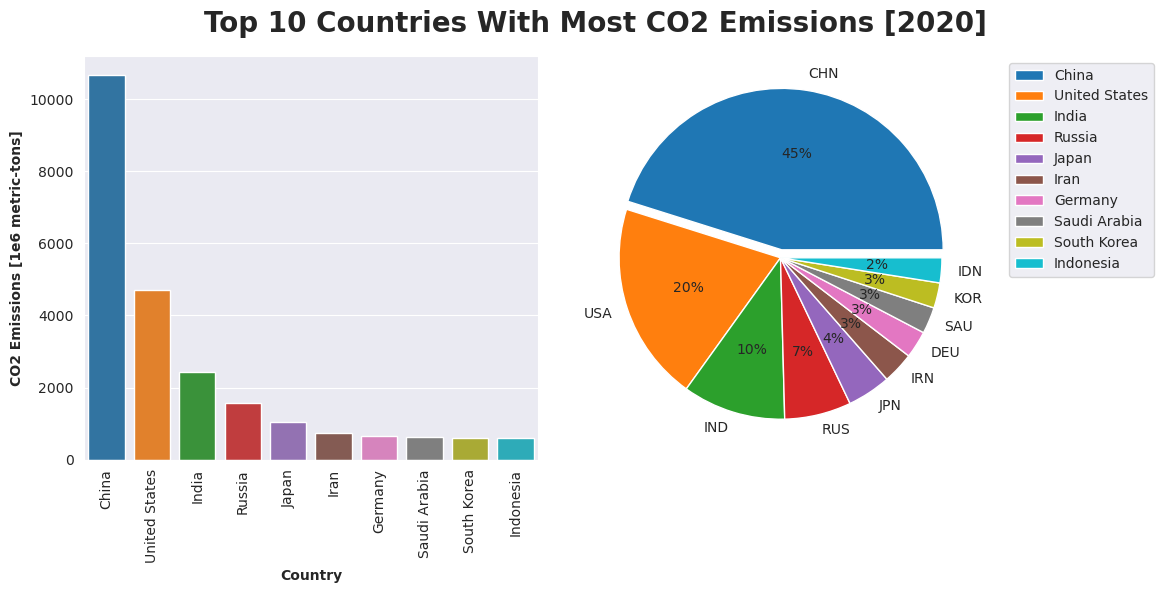

In [114]:
top_10_co2 = df_2[df_2["year"] == 2020][["country", "iso_code", "co2"]].sort_values(by="co2", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_co2, x=top_10_co2["country"], y=top_10_co2["co2"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_co2["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_co2["co2"], labels=top_10_co2["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_co2["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Countries With Most CO2 Emissions [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **3. Top 10 countries with most CO2 emissions per capita in 2020.**

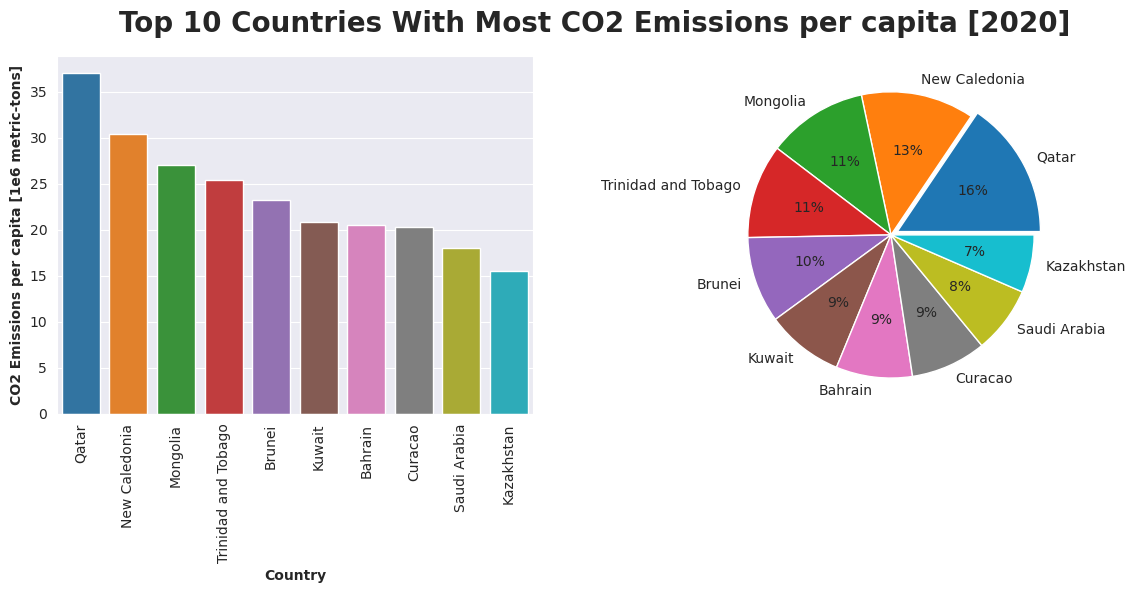

In [34]:
top_10_per_capita = df_2[df_2["year"] == 2020][["country", "co2_per_capita"]].sort_values(by="co2_per_capita", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_per_capita, x=top_10_per_capita["country"], y=top_10_per_capita["co2_per_capita"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_per_capita["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions per capita [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_per_capita["co2_per_capita"], labels=top_10_per_capita["country"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
fig.suptitle('Top 10 Countries With Most CO2 Emissions per capita [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **4. Top 10 countries by Gross Domestic Product (GDP)**

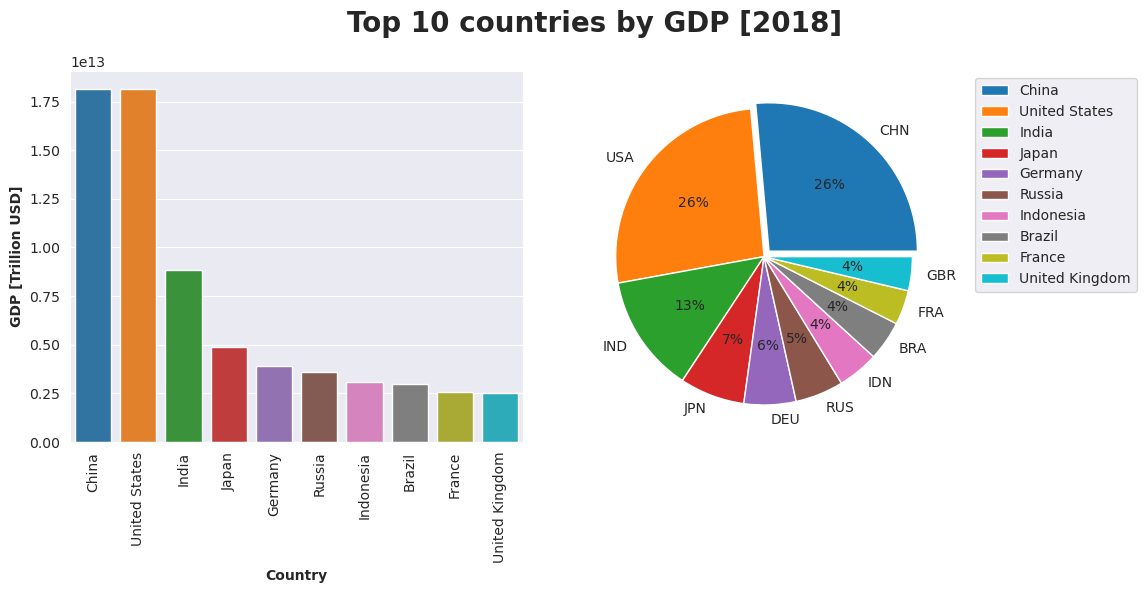

In [113]:
top_10_gdp = df_2[df_2["year"] == 2018][["country", "iso_code", "gdp"]].sort_values(by="gdp", ascending=False).head(10)
# GDP data has only been recorded until 2018

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_gdp, x=top_10_gdp["country"], y=top_10_gdp["gdp"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_gdp["country"], rotation=90)
axes[0].set_ylabel("GDP [Trillion USD]", fontweight="bold")
plt.pie(top_10_gdp["gdp"], labels=top_10_gdp["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_gdp["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 countries by GDP [2018]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **5. Top 10 richest countries yearly CO2 emissions**

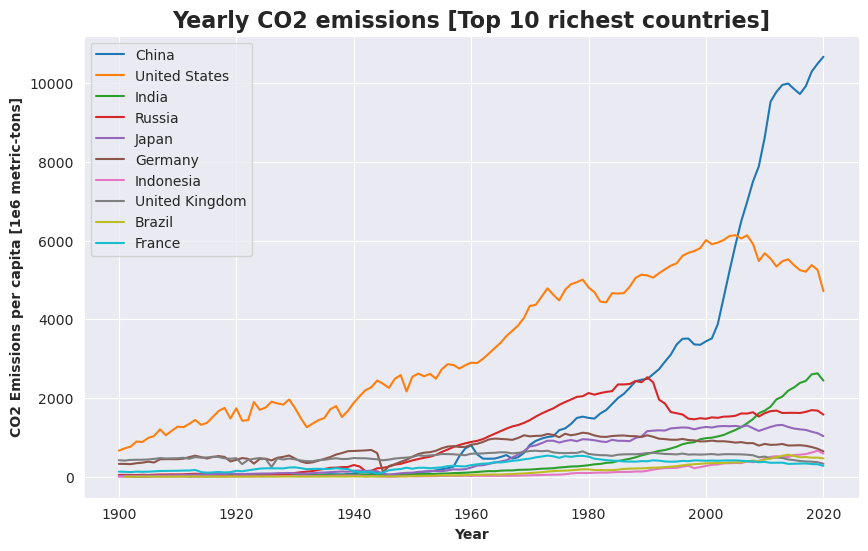

In [129]:
top_10_co2_growth = df[df["country"].isin(list(top_10_gdp["country"]))][["country", "year", "iso_code", "gdp", "co2", "co2_growth_prct"]].sort_values(by="co2", ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_co2_growth, x=top_10_co2_growth["year"], y=top_10_co2_growth["co2"], hue=top_10_co2_growth["country"])
plt.title("Yearly CO2 emissions [Top 10 richest countries]", fontweight="bold", fontsize=16)
plt.xlabel("Year", weight="bold")
plt.ylabel("CO2 Emissions per capita [1e6 metric-tons]", weight="bold")
plt.legend()
plt.show()

### **5. Top 10 most energy consuming countries.**

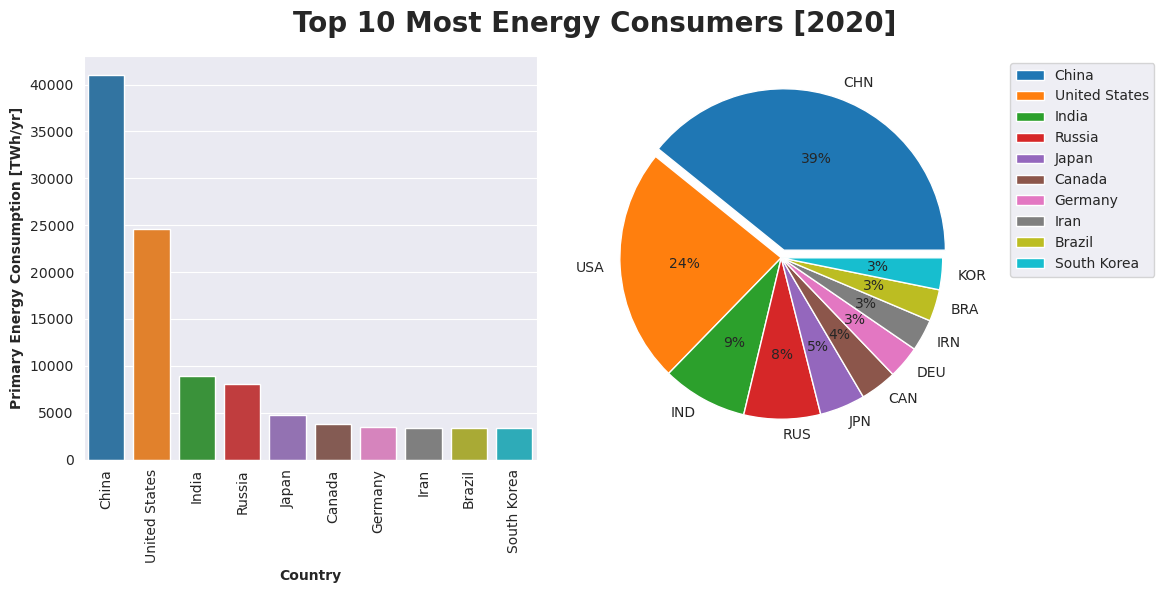

In [133]:
top_10_energy = df_2[df_2["year"] == 2020][["country", "iso_code", "primary_energy_consumption"]].sort_values(by="primary_energy_consumption", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_energy, x=top_10_energy["country"], y=top_10_energy["primary_energy_consumption"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_energy["country"], rotation=90)
axes[0].set_ylabel("Primary Energy Consumption [TWh/yr]", fontweight="bold")
plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Most Energy Consumers [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()